In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/national_illness.csv')
df.head(2)

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01 00:00:00,1.22262,1.16668,582,805,2060,754,176569
1,2002-01-08 00:00:00,1.33344,1.21650,683,872,2267,785,186355


In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [4]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [5]:
show = df[['OT']]
# 使用STL进行分解
period = 12
stl = STL(show, seasonal=13, period=period)
result = stl.fit()

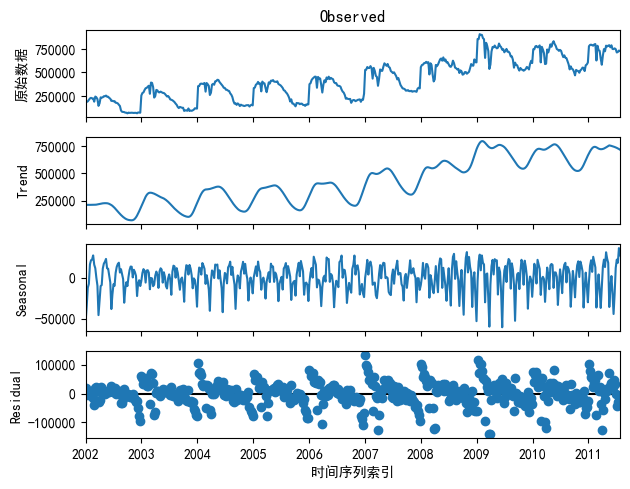

In [6]:
# 数据展示
show = df[['OT']].iloc[0:500]
# 使用STL进行分解
period = 12
stl = STL(show, seasonal=13, period=period)
res = stl.fit()
# 设置字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号正常显示
# 绘制STL分解图，并添加标题
fig = res.plot()

# 获取子图的Axes对象
axes = fig.get_axes()

# 设置每个子图的横纵坐标标签
axes[0].set_ylabel('原始数据')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

# 设置共享的x轴标签
axes[3].set_xlabel('时间序列索引')
plt.show()

In [6]:
df['trend'] = result.trend
df['seasonal'] = result.seasonal
df['residual'] = result.resid

In [7]:
# 计算相关性
# 计算相关性
correlations = df.corr()['OT'].drop('OT')

In [9]:
correlations = pd.DataFrame(correlations)
correlations.to_csv('output/feature_illness.csv')

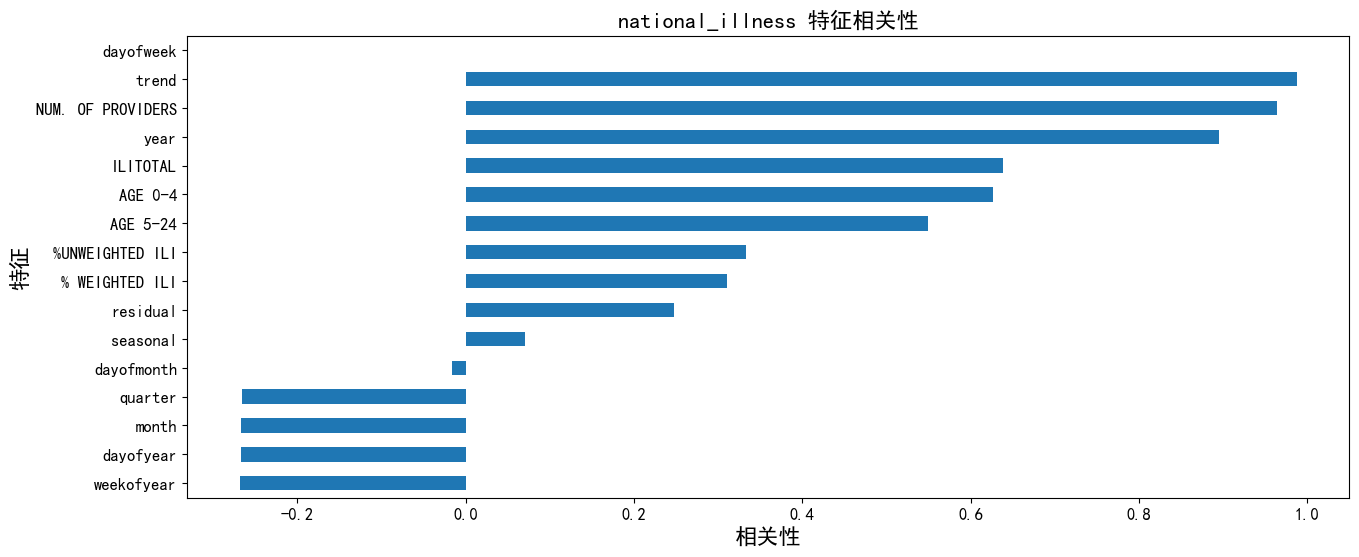

In [8]:
# 绘制柱状图
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6))
correlations.sort_values().plot(kind='barh')
plt.title('national_illness 特征相关性', fontsize=16)
plt.xlabel('相关性', fontsize=16)
plt.ylabel('特征', fontsize=16)
# 设置刻度标签的字体大小
plt.xticks(fontsize=12)  # 设置x轴刻度标签字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度标签字体大小
plt.show()


In [19]:
# 示例数据：标准化前的数据和标准化后的数据
data_raw = df['OT']
data_trend = df['trend']
data_NUM = df['NUM. OF PROVIDERS']
data_year = df['year']
data_ILITOTAL = df['ILITOTAL']
data_AGE04 = df['AGE 0-4']
data_AGE524 = df['AGE 5-24']
data_UNWEIGHTED = df['%UNWEIGHTED ILI']
data_WEIGHTED = df['% WEIGHTED ILI']

In [20]:
data_scaled = (data_raw - np.mean(data_raw)) / np.std(data_raw)
data_trend_scaled = (data_trend - np.mean(data_trend)) / np.std(data_trend)
data_NUM_scaled = (data_NUM - np.mean(data_NUM)) / np.std(data_NUM)
data_year_scaled = (data_year - np.mean(data_year)) / np.std(data_year)
data_ILITOTAL_scaled = (data_ILITOTAL - np.mean(data_ILITOTAL)) / np.std(data_ILITOTAL)
data_AGE04_scaled = (data_AGE04 - np.mean(data_AGE04)) / np.std(data_AGE04)
data_AGE524_scaled = (data_AGE524 - np.mean(data_AGE524)) / np.std(data_AGE524)
data_UNWEIGHTED_scaled = (data_UNWEIGHTED - np.mean(data_UNWEIGHTED)) / np.std(data_UNWEIGHTED)
data_WEIGHTED_scaled = (data_WEIGHTED - np.mean(data_WEIGHTED)) / np.std(data_WEIGHTED)

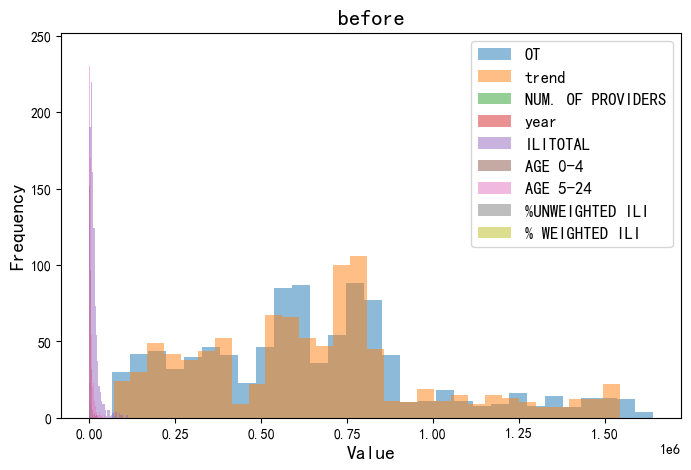

In [21]:
# 字体大小设置
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

# 绘制直方图
plt.figure(figsize=(8, 5))
# 绘制标准化前的数据的直方图
plt.hist(data_raw, bins=30, alpha=0.5, label='OT')
plt.hist(data_trend, bins=30, alpha=0.5, label='trend')
plt.hist(data_NUM, bins=30, alpha=0.5, label='NUM. OF PROVIDERS')
plt.hist(data_year, bins=30, alpha=0.5, label='year')
plt.hist(data_ILITOTAL, bins=30, alpha=0.5, label='ILITOTAL')
plt.hist(data_AGE04, bins=30, alpha=0.5, label='AGE 0-4')
plt.hist(data_AGE524, bins=30, alpha=0.5, label='AGE 5-24')
plt.hist(data_UNWEIGHTED, bins=30, alpha=0.5, label='%UNWEIGHTED ILI')
plt.hist(data_WEIGHTED, bins=30, alpha=0.5, label='% WEIGHTED ILI')

# 添加图例和标题
plt.legend(fontsize=legend_fontsize)
plt.title('before', fontsize=title_fontsize)
plt.xlabel('Value', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)

# 显示图形
plt.show()

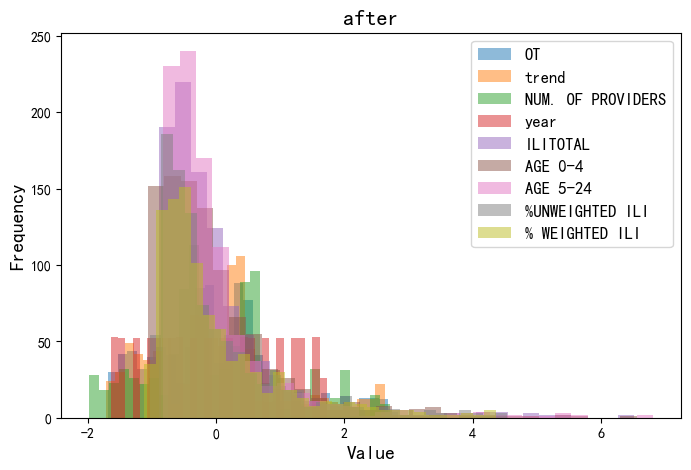

In [22]:


# 绘制直方图
plt.figure(figsize=(8, 5))

# 绘制标准化后的数据的直方图
plt.hist(data_scaled, bins=30, alpha=0.5, label='OT')
plt.hist(data_trend_scaled, bins=30, alpha=0.5, label='trend')
plt.hist(data_NUM_scaled, bins=30, alpha=0.5, label='NUM. OF PROVIDERS')
plt.hist(data_year_scaled, bins=30, alpha=0.5, label='year')
plt.hist(data_ILITOTAL_scaled, bins=30, alpha=0.5, label='ILITOTAL')
plt.hist(data_AGE04_scaled, bins=30, alpha=0.5, label='AGE 0-4')
plt.hist(data_AGE524_scaled, bins=30, alpha=0.5, label='AGE 5-24')
plt.hist(data_UNWEIGHTED_scaled, bins=30, alpha=0.5, label='%UNWEIGHTED ILI')
plt.hist(data_WEIGHTED_scaled, bins=30, alpha=0.5, label='% WEIGHTED ILI')

# 添加图例和标题
plt.legend(fontsize=legend_fontsize)
plt.title('after', fontsize=title_fontsize)
plt.xlabel('Value', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)

# 显示图形
plt.show()

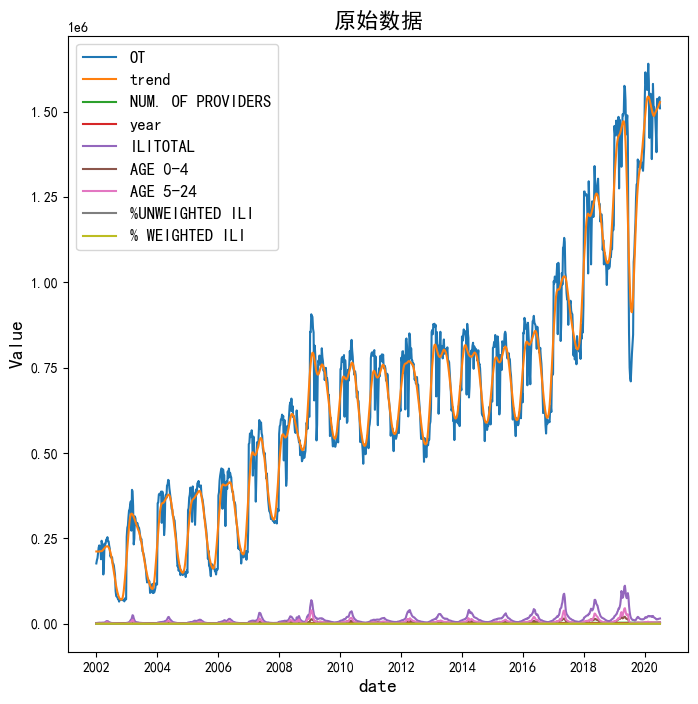

In [23]:
import matplotlib.pyplot as plt

# 设置字体大小
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

# 绘制折线图
plt.figure(figsize=(8, 8))

# 绘制每个数据集的折线图
plt.plot(data_raw, label='OT')
plt.plot(data_trend, label='trend')
plt.plot(data_NUM, label='NUM. OF PROVIDERS')
plt.plot(data_year, label='year')
plt.plot(data_ILITOTAL, label='ILITOTAL')
plt.plot(data_AGE04, label='AGE 0-4')
plt.plot(data_AGE524, label='AGE 5-24')
plt.plot(data_UNWEIGHTED, label='%UNWEIGHTED ILI')
plt.plot(data_WEIGHTED, label='% WEIGHTED ILI')

# 添加图例和标题
plt.legend(fontsize=legend_fontsize)
plt.title('原始数据', fontsize=title_fontsize)
plt.xlabel('date', fontsize=label_fontsize)
plt.ylabel('Value', fontsize=label_fontsize)

# 显示图形
plt.show()


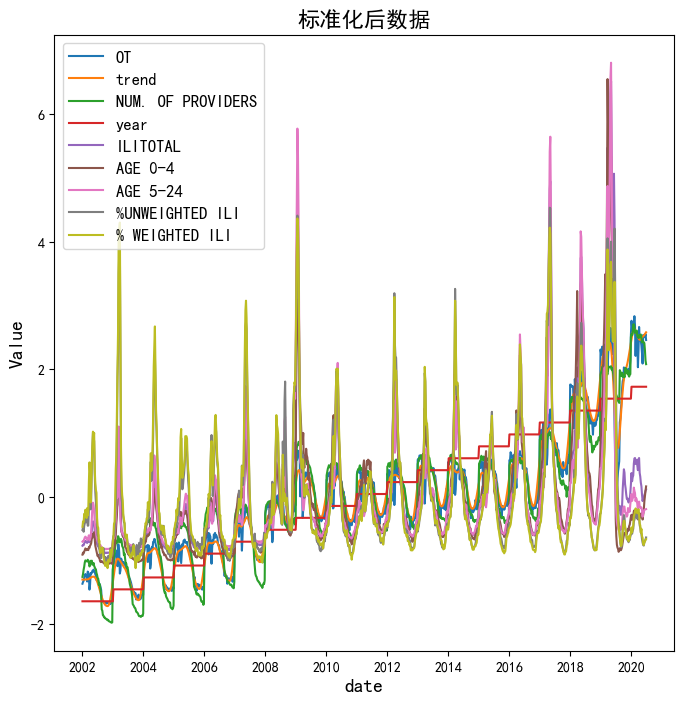

In [24]:
import matplotlib.pyplot as plt

# 设置字体大小
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

# 绘制折线图
plt.figure(figsize=(8, 8))

# 绘制每个数据集的折线图
plt.plot(data_scaled, label='OT')
plt.plot(data_trend_scaled, label='trend')
plt.plot(data_NUM_scaled, label='NUM. OF PROVIDERS')
plt.plot(data_year_scaled, label='year')
plt.plot(data_ILITOTAL_scaled, label='ILITOTAL')
plt.plot(data_AGE04_scaled, label='AGE 0-4')
plt.plot(data_AGE524_scaled, label='AGE 5-24')
plt.plot(data_UNWEIGHTED_scaled, label='%UNWEIGHTED ILI')
plt.plot(data_WEIGHTED_scaled, label='% WEIGHTED ILI')

# 添加图例和标题
plt.legend(fontsize=legend_fontsize)
plt.title('标准化后数据', fontsize=title_fontsize)
plt.xlabel('date', fontsize=label_fontsize)
plt.ylabel('Value', fontsize=label_fontsize)

# 显示图形
plt.show()


In [11]:
df.to_csv('ETTm1.csv',index=False)